<a href="https://colab.research.google.com/github/tonmoy7722/Recommendation-system/blob/main/recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [3]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

opendatasets is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from opendatasets) (4.66.2)

Requirement already satisfied: kaggle in /usr/local/lib/python3.10/dist-packages (from opendatasets) (1.6.12)

Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from opendatasets) (8.1.7)

Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi>=2023.7.22 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2024.2.2)

Requirement already satisfied: python-dateutil in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.8.2)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.31.0)

Requirement already satisfied: python-slugify in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (8.0.4)

Requirement already satisfied: urllib3 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.0.7)

Requirement already satisfied: bleach in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (6.1.0)

Requirement already satisfied: webencodings in /usr/local/lib/python3.10/dist-packages (from bleach->kaggle->opendatasets) (0.5.1)

Requirement already satisfied: text-unidecode>=1.3 in /usr/local/lib/python3.10/dist-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.3.2)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.7)

Installing collected packages: opendatasets

Successfully installed opendatasets-0.1.22

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tstonmoy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/irvifa/amazon-product-reviews


100%|██████████| 109M/109M [00:01<00:00, 77.5MB/s]


In [4]:
#load the dataframe and set column name
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [5]:
df.shape

(7824482, 4)

In [6]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [7]:
fashion_data=df.sample(n=1564896,ignore_index=True)

In [8]:
#after taking samples drop df to release the memory occupied by entire dataframe
del df

In [9]:
#print top 5 records of the dataset
fashion_data.head()

,userId,productId,rating,timestamp
0,A30TNEEJH0GZXZ,B000CSWCQA,5.0,1249171200
1,AUIVTCXXICLHY,B001Y09QZ0,5.0,1304812800
2,A35V3HG4MWL32I,B004S50WPG,5.0,1385769600
3,A3ARPBQHNQN6NN,B0058AFS0O,5.0,1404518400
4,ADKQXK2MECDU6,B008ISKDL2,4.0,1357948800


In [10]:
#print the concise information of the dataset
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [11]:
#drop timestamp column
fashion_data.drop('timestamp',axis=1,inplace=True)

In [12]:
fashion_data.describe()

,rating
count,1.564896e+06
mean,4.010511e+00
std,1.381679e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [13]:
#handle missing values
fashion_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [14]:
#handling duplicate records
fashion_data[fashion_data.duplicated()].shape[0]

0

In [15]:
fashion_data.head()

,userId,productId,rating
0,A30TNEEJH0GZXZ,B000CSWCQA,5.0
1,AUIVTCXXICLHY,B001Y09QZ0,5.0
2,A35V3HG4MWL32I,B004S50WPG,5.0
3,A3ARPBQHNQN6NN,B0058AFS0O,5.0
4,ADKQXK2MECDU6,B008ISKDL2,4.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

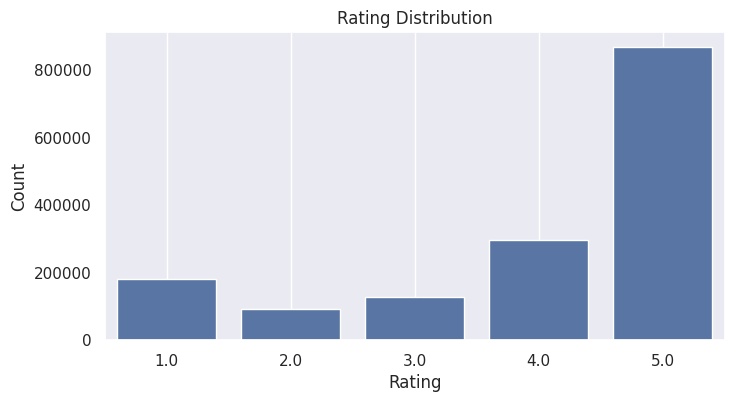

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=fashion_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [17]:
print('Total rating : ',fashion_data.shape[0])
print('Total unique users : ',fashion_data['userId'].unique().shape[0])
print('Total unique products : ',fashion_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225931
Total unique products :  238204


In [18]:
no_of_rated_products_per_user = fashion_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A3OXHLG6DIBRW8    106
ADLVFFE4VBT8      101
A5JLAU2ARJ0BO      96
A6FIAB28IS79       92
A680RUE1FDO8B      89
Name: rating, dtype: int64

In [19]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 29 


In [20]:
data=fashion_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [21]:
data.head()

,userId,productId,rating
0,A30TNEEJH0GZXZ,B000CSWCQA,5.0
2,A35V3HG4MWL32I,B004S50WPG,5.0
4,ADKQXK2MECDU6,B008ISKDL2,4.0
6,A3N82FDVW0432Y,B005058B56,5.0
7,A1LBGUVFLHQCG3,B009QBIZ60,1.0


In [22]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [23]:
no_of_rating_per_product.head()

productId
B0074BW614    3720
B00DR0PDNE    3263
B007WTAJTO    2775
B006GWO5WK    2402
B0019EHU8G    2366
Name: rating, dtype: int64

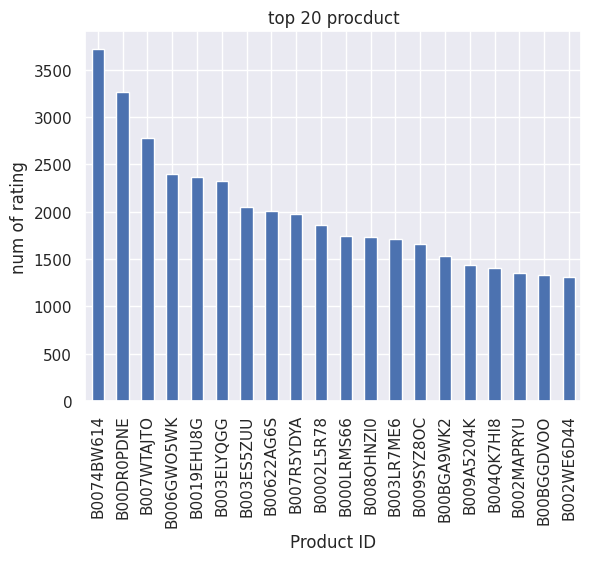

In [24]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [25]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [26]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.361582
1400532655,3.880952
140053271X,3.795455
B00000DM9W,4.535211
B00000J061,3.833333


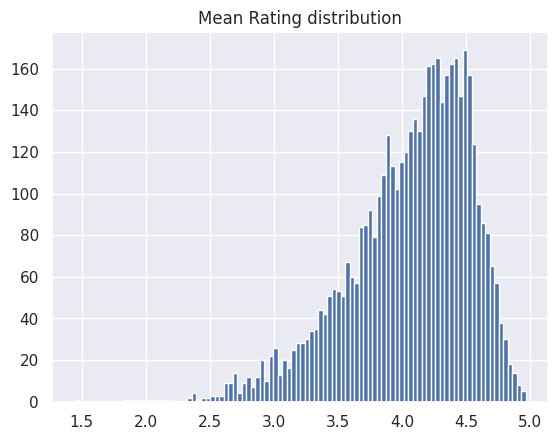

In [27]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [28]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9194490089332464

In [29]:
#it is highly negative skewed

In [30]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [31]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.361582,177
1400532655,3.880952,84
140053271X,3.795455,88
B00000DM9W,4.535211,71
B00000J061,3.833333,54


In [32]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.477419,3720


In [33]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  116


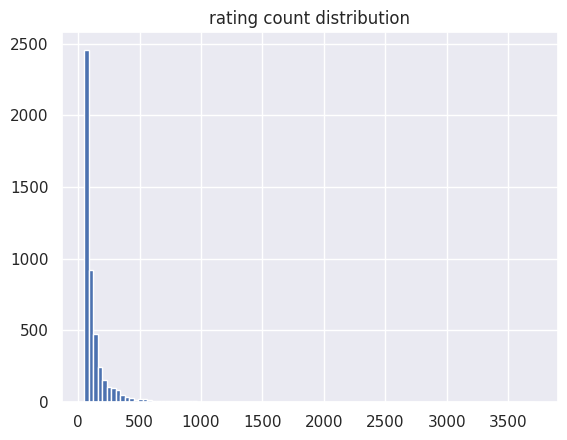

In [34]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

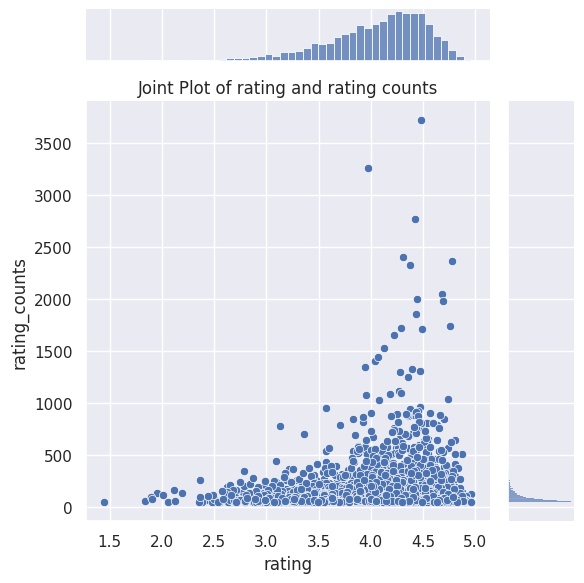

In [35]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

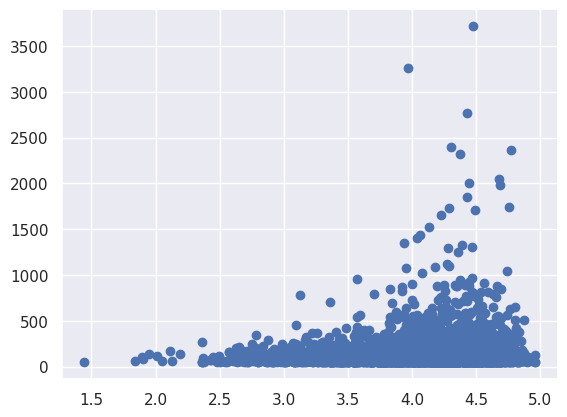

In [36]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [37]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.11123410060672816 


In [38]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


surprise is not installed. Installing...


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Collecting scikit-surprise (from surprise)

Downloading scikit-surprise-1.1.3.tar.gz (771 kB)

Output()

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Requirement already satisfied: joblib>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.4.0)

Requirement already satisfied: numpy>=1.17.3 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.25.2)

Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.11.4)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (setup.py): started

Building wheel for scikit-surprise (setup.py): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162996 sha256=36b1a0fd0d17883114813a5400c608ddcd86e95a07649e4048ce06dc605a0d56

Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.3 surprise-0.1

In [39]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [40]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [41]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [42]:
#make prediction using testset
test_pred=algo.test(testset)

In [43]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3151


1.3150571203423764

In [44]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,B00000DM9W,B00000JI4F,B00000K135,B00000K2YR,B00000K4KH,B00001OWYM,B00001P4XA,B00001P4XH,...,B00HVLUR86,B00I2VIR2M,B00I94IPTW,B00IF70QCW,B00IGISO9C,B00INNP5VU,B00IO1V33U,B00ISGCAJM,B00IT1WJZQ,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A00399441NQU28PIU495X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A009998728FJ4SYKM8GEF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01216517CPQ0ZZLP5WE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01335702CE258F6ACRQ5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0145894P2TIW5QKG28V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19883, 4383)

In [46]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00399441NQU28PIU495X,A009998728FJ4SYKM8GEF,A01216517CPQ0ZZLP5WE,A01335702CE258F6ACRQ5,A0145894P2TIW5QKG28V,A01633509ZBI7LGYMV8K,A0188546ES14USV0TFXO,A031092683FZA5HT1PEH,A0317784S04NV8QVY364,A033947535QS3MWI64Z04,...,AZXNS00WMWRHJ,AZXXZEYJGD9NW,AZYTEJO5TX4AR,AZYUA7CEH4W56,AZYWG20GP2ETU,AZZ5T4KCM5VQT,AZZH3GGYQSBUC,AZZJDX75CF3ZH,AZZSLBC9WIRH3,AZZYW4YOE1B6E
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000JI4F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000K135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
x_ratings_matrix.shape

(4383, 19883)

In [48]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4383, 10)

In [49]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4383, 4383)

In [50]:
x_ratings_matrix.index[10]

'B00001P4ZH'

In [51]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

10


In [52]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4383,)

In [53]:
correlation_matrix[correlation_product_ID>0.75].shape

(599, 4383)

In [54]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00000K135',
 'B00001P4XH',
 'B00001P4ZH',
 'B00001W0DH',
 'B00004SABJ',
 'B00004T1XK',
 'B00004TWM6',
 'B00004Z5M1',
 'B00005ATMB',
 'B00005NIMJ',
 'B000066R6M',
 'B000067G0J',
 'B000067O5G',
 'B000067RC4',
 'B00006I53S',
 'B00006I5J7',
 'B00007KDVI',
 'B00007LTBA',
 'B000089GN3',
 'B00008EM7U']